# Outliers and its impact on machine learning use cases

### Which machine learning models are sensitive to Outliers?
#### 1) Naive Bayes Classifier --- Not sensitive to outliers
#### 2) SVM --                     Not sensitive to outliers
#### 3) Linear Regression --       Sensitive to outliers
#### 4) Logistic Regression --     Sensitive to outliers
#### 5) Decision Tree Regressor (or) classifier -- Not sensitive to outliers
#### 6) Ensemble(RF, Xgboost, GB)- Not sensitive to outliers
#### 7) KNN --                     Not sensitive to outliers
#### 8) KMeans --                  Sensitive
#### 9) Hierarichal --             Sensitive
#### 10) PCA --                     Sensitive
#### 11) Neural Networks --         Sensitive
#### 12) DBscan --               Sensitive
- Note : All unsupervisied machine learning models are sensitive to outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

pd.pandas.set_option("display.max_columns", None)
pd.pandas.set_option("display.max_rows",None)

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### It follows Gaussian/Normal distribution

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

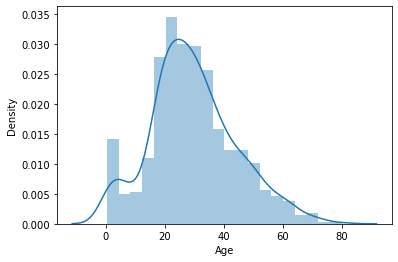

In [5]:
sns.distplot(df['Age'].dropna())  # It looks like normal distribution(good one)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

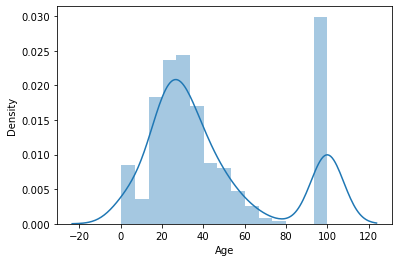

In [6]:
sns.distplot(df['Age'].fillna(100))  # here 100 is the outlier

Text(0, 0.5, 'No of passengers')

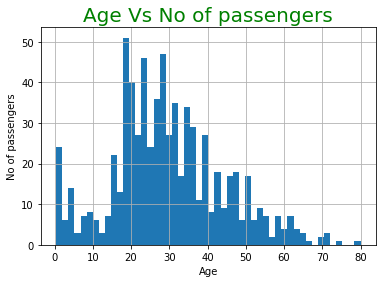

In [7]:
figure = df.Age.hist(bins=50)    # one way to plot graph like matplotlib ww use to plot
figure.set_title("Age Vs No of passengers", fontsize =20, color = "Green")
figure.set_xlabel("Age")
figure.set_ylabel("No of passengers")

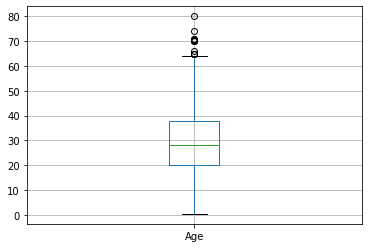

In [15]:
figure = df.boxplot(column = "Age")

In [9]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
#### Assuming Age follows A Gaussian distribution we will calculate the boundaries which differentiate the outliers
# here we will take upper_boundary as 3 standard deviation rightside to the mean in graph and lower_boundary as 3 standard deviation leftside to the mean in the graph
mean = df['Age'].mean()
upper_boundary = df['Age'].mean() + 3 * df['Age'].std()
lower_boundary = df['Age'].mean() - 3 * df['Age'].std()
print("Mean : ",mean)
print("upper_boundary : ",upper_boundary)
print("lower_boundary : ",lower_boundary)

Mean :  29.69911764705882
upper_boundary :  73.27860964406095
lower_boundary :  -13.88037434994331


### If the Data is Gaussian distribution until here (lower_boundary, upper_boundary)we can decide and say these are the outliers

In [11]:
#### lets compute the Inter Quantile range to calculate the boundaries
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
IQR

17.875

### This is for the Skewed Data. we need to use the below technique(lower_bridge, upper_bridge) to find the outliers

In [12]:
lower_bridge = df['Age'].quantile(0.25) - (IQR*1.5)  # this 1.5 value is given by domain expert but we take 1.5 usually
upper_bridge = df['Age'].quantile(0.75) + (IQR*1.5)
print("lower_bridge : ",lower_bridge) # here we will not take negative values as age cannot be negative
print("upper_bridge : ",upper_bridge)  # after 64 everythng is outlier

lower_bridge :  -6.6875
upper_bridge :  64.8125


In [13]:
# Extreme Outilers 
#like in the gaussian graph within 3 standard deviation we have 99.5% of the data
lower_bridge = df['Age'].quantile(0.25) - (IQR*3)
upper_bridge = df['Age'].quantile(0.75) + (IQR*3)
print("lower_bridge : ",lower_bridge)
print("upper_bridge : ",upper_bridge)  # here after 91.6 all are outliers

lower_bridge :  -33.5
upper_bridge :  91.625


# What if the feature is Skwews?

Text(0, 0.5, 'No of passengers')

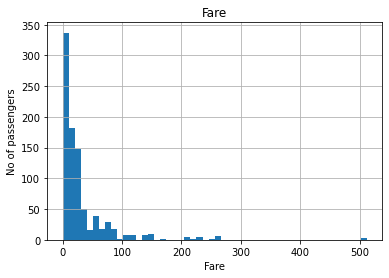

In [22]:
figure_FARE = df.Fare.hist(bins=50)   ## here the data is rightly skewed
figure_FARE.set_title("Fare")
figure_FARE.set_xlabel("Fare")
figure_FARE.set_ylabel("No of passengers")

<AxesSubplot:>

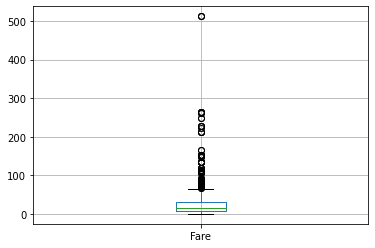

In [23]:
df.boxplot(column = 'Fare')  # in plot we can so many outliers are there

In [24]:
df['Fare'].describe()  # there is a huge difference between 75%ile and max value we can see

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [27]:
IQR_FARE = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
IQR_FARE

23.0896

In [28]:
lower_bridge = df['Fare'].quantile(0.25) - (IQR_FARE*1.5)
upper_bridge = df['Fare'].quantile(0.75) + (IQR_FARE *1.5)
print("lower_bridge : " ,lower_bridge)
print("upper_bridge : " ,upper_bridge)

lower_bridge :  -26.724
upper_bridge :  65.6344


### In case of Skewed Data we need to use these extreme Outliers

In [29]:
# EXtreme Outliers
lower_bridge = df['Fare'].quantile(0.25) - (IQR_FARE*3)
upper_bridge = df['Fare'].quantile(0.75) + (IQR_FARE *3)
print("lower_bridge : " ,lower_bridge)
print("upper_bridge : " ,upper_bridge)

lower_bridge :  -61.358399999999996
upper_bridge :  100.2688


### Now we can either remove or replace the outliers. If the dataset is very less we need to replace it els remove the outliers

In [30]:
data = df.copy()

In [31]:
data.loc[data['Age']>=73, 'Age'] = 73   # here we arae replacing the outliers

In [33]:
data.loc[data['Fare']>=100, 'Fare'] = 100 # here we are replacing the outliers

Text(0, 0.5, 'No of passengers')

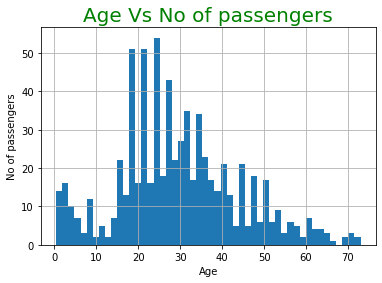

In [34]:
figure = data.Age.hist(bins=50)    # one way to plot graph like matplotlib we use to plot
figure.set_title("Age Vs No of passengers", fontsize =20, color = "Green")
figure.set_xlabel("Age")
figure.set_ylabel("No of passengers") # here we can the maximum age is now 73

Text(0, 0.5, 'No of passengers')

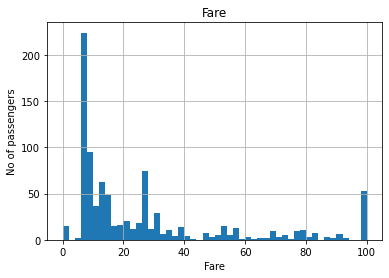

In [35]:
figure_FARE = data.Fare.hist(bins=50)   ## here the data is rightly skewed
figure_FARE.set_title("Fare")
figure_FARE.set_xlabel("Fare")
figure_FARE.set_ylabel("No of passengers") # here the maximum Fare is 100

### Lets apply some ML algotithms on the dataset how it works

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0), data['Survived'], test_size=0.3)

In [43]:
#### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score : {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy_score : 0.6940298507462687
roc_auc_score : 0.7086915278354182


##### lets apply some another ML algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score
print("Accuracy_score : {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score : {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy_score : 0.6828358208955224
roc_auc_score : 0.7353708424734688
